# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Observable Trends
1. The closer the city is from the equator the higher the temperature is and per consequence the farther the city is from the equator the lower the temperature is. This is mainly because of the angle of influence of solar rays and the round form of the earth.
2. The city latitude impact mostly the temperature and not much of the other parameters we have analyzed such as cloudiness, humidity or wind speed. Other factors may have influence and some of the parameters we analyzed like "Season vs. Wind Speed" as usually spring tends to be the windiest season of the year, but further analysis needs to be conducted to confirm this theory.
3. There is no visible association between latitude and humidity, however, looking at the heatmap from Part II - VacationPy, we can notice that humidty level tends to be higher in coastal cities. Further analysis needs to be conducted to confirm this theory.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print("Beginning Data Retrieval")
print("----------------------------")
city_name=[]
city_longitude=[]
city_latitude=[]
city_max_temp=[]
city_humidity=[]
city_cloudiness=[]
city_wind_speed=[]
city_country=[]
city_date=[]
set_number=1
city_number=0

for index, city in enumerate(cities):
    city_number+=1
    if city_number==50:
        city_number=1
        set_number+=1
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {city_number} of set {set_number} | {response['name']}")
        city_name.append(response["name"])
        city_longitude.append(response["coord"]["lon"])
        city_latitude.append(response["coord"]["lat"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_cloudiness.append(response["clouds"]["all"])
        city_wind_speed.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
    except KeyError:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of set 1 | Mataura
Processing Record 2 of set 1 | Avarua
Processing Record 3 of set 1 | Vaini
Processing Record 4 of set 1 | Nantucket
Processing Record 5 of set 1 | São Filipe
Processing Record 6 of set 1 | Bredasdorp
Processing Record 7 of set 1 | Hobart
Processing Record 8 of set 1 | Hithadhoo
Processing Record 9 of set 1 | Saint Paul Harbor
City not found. Skipping...
Processing Record 11 of set 1 | Bethel
Processing Record 12 of set 1 | Atar
Processing Record 13 of set 1 | Albany
Processing Record 14 of set 1 | Faanui
Processing Record 15 of set 1 | Mayo
Processing Record 16 of set 1 | Grants
City not found. Skipping...
Processing Record 18 of set 1 | Punta Arenas
Processing Record 19 of set 1 | Rikitea
Processing Record 20 of set 1 | Kiryat Gat
Processing Record 21 of set 1 | Severo-Kuril'sk
Processing Record 22 of set 1 | Bacolod City
Processing Record 23 of set 1 | Palmer
Processing Record 24 of set 1 | C

Processing Record 10 of set 5 | Lebu
Processing Record 11 of set 5 | Lompoc
Processing Record 12 of set 5 | Timbiquí
Processing Record 13 of set 5 | Kavaratti
Processing Record 14 of set 5 | Bo Rai
Processing Record 15 of set 5 | Warrnambool
Processing Record 16 of set 5 | Sørland
City not found. Skipping...
Processing Record 18 of set 5 | Japura
Processing Record 19 of set 5 | Faya
Processing Record 20 of set 5 | Almaznyy
Processing Record 21 of set 5 | Sika
Processing Record 22 of set 5 | Chumikan
Processing Record 23 of set 5 | Ayabaca
Processing Record 24 of set 5 | Mount Gambier
Processing Record 25 of set 5 | Dukat
Processing Record 26 of set 5 | Apricena
Processing Record 27 of set 5 | Chernushka
Processing Record 28 of set 5 | Yellowknife
Processing Record 29 of set 5 | Ambon City
Processing Record 30 of set 5 | Cam Ranh
Processing Record 31 of set 5 | Muroto-misakicho
Processing Record 32 of set 5 | Half Moon Bay
Processing Record 33 of set 5 | Mahébourg
Processing Record 34 o

Processing Record 14 of set 9 | San Buenaventura
Processing Record 15 of set 9 | George
Processing Record 16 of set 9 | Juradó
Processing Record 17 of set 9 | Saskylakh
Processing Record 18 of set 9 | San Patricio
Processing Record 19 of set 9 | Aranda de Duero
Processing Record 20 of set 9 | Mineiros
Processing Record 21 of set 9 | Plouzané
City not found. Skipping...
Processing Record 23 of set 9 | Bodaybo
Processing Record 24 of set 9 | Senneterre
Processing Record 25 of set 9 | Belle Fourche
Processing Record 26 of set 9 | Curup
Processing Record 27 of set 9 | Oktyabr'skoye
City not found. Skipping...
City not found. Skipping...
Processing Record 30 of set 9 | Paka
Processing Record 31 of set 9 | Altay
Processing Record 32 of set 9 | Shaoyang
Processing Record 33 of set 9 | Stokmarknes
Processing Record 34 of set 9 | Konza
Processing Record 35 of set 9 | Qandala
Processing Record 36 of set 9 | Lewistown
Processing Record 37 of set 9 | Ovalle
Processing Record 38 of set 9 | Caravela

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df=pd.DataFrame({
    "City": city_name,
    "Cloudiness": city_cloudiness,
    "Country": city_country,
    "Date": city_date,
    "Humidity":city_humidity,
    "Lat":city_latitude,
    "Lng":city_longitude,
    "Max Temp":city_max_temp,  
    "Wind": city_wind_speed,    
})
weather_df["Lat"]=weather_df["Lat"].astype(float).round(2)
weather_df["Lng"]=weather_df["Lng"].astype(float).round(2)
weather_df["City"]=weather_df["City"].str.lower()


weather_df.to_csv(output_data_file,index=False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind
0,mataura,6,NZ,1634853067,54,-46.19,168.86,57.00,3.62
1,avarua,20,CK,1634853067,65,-21.21,-159.78,77.05,10.36
2,vaini,75,TO,1634853068,83,-21.20,-175.20,78.96,5.75
3,nantucket,1,US,1634853068,88,41.28,-70.10,66.34,12.66
4,são filipe,21,CV,1634853068,64,14.90,-24.50,81.43,6.60


In [5]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind
count,556.000000,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000
mean,56.615108,1.634853e+09,72.726619,19.291043,15.793777,60.421241,7.660737
std,38.714237,7.846664e+01,19.269845,33.715230,88.346143,19.899661,5.946333
min,0.000000,1.634853e+09,13.000000,-54.800000,-179.170000,-16.060000,0.000000
25%,20.000000,1.634853e+09,63.000000,-8.755000,-61.882500,48.735000,3.440000
50%,67.000000,1.634853e+09,77.000000,22.675000,18.720000,65.130000,6.275000
75%,98.000000,1.634853e+09,87.000000,47.942500,93.037500,76.442500,10.147500
max,100.000000,1.634853e+09,100.000000,78.220000,179.320000,93.580000,39.010000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Inspecting the data for cities with humidiy > 100%
weather_df.loc[weather_df["Humidity"]>100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind


In [7]:
# Inspecting the data for cities with humidiy > 100%
weather_df.loc[weather_df["Humidity"]>100].index

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

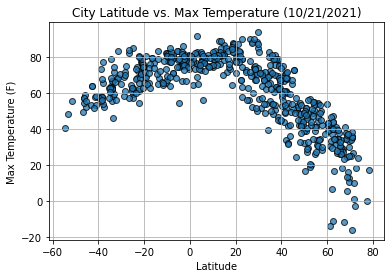

In [8]:
plt.scatter(city_latitude, city_max_temp,edgecolor="black",alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%Y')})")
plt.savefig("../Images/Latitude_vs_Temperature.png")
plt.show()

The above scatter plot analyzes the relationship between the city latitude (the predictor) and city max temperature (the response). We can see that if we split the graph in 2 parts, there is a kind of positive linear association between city latitude and city max temperature for cities with latitude inferior to 0 (city max temperature increases as the city latitude increases) in contrary to cities with latitude superior to 0 where we can see some sort of negative linear association as the temperature decreases when the latitude increases. However, looking at the graph as a whole we can see that there is a nonlinear association. In other terms, the farther the city is from the equator, the lower is its max temperature.

## Latitude vs. Humidity Plot

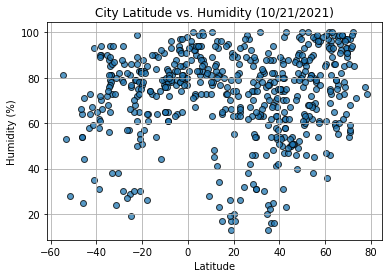

In [9]:
plt.scatter(city_latitude, city_humidity,edgecolor="black",alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date.today().strftime('%m/%d/%Y')})")
plt.savefig("../Images/Latitude_vs_Humidity.png")
plt.show()

The above scatter plot analyzes the relationship between the city latitude (the predictor) and city humidity (the response). We can see that there is no association between the city latitude and the city humidity level (%) and regardless the latitude, most cities in this dataset have a humidity level (%) over 60%.

## Latitude vs. Cloudiness Plot

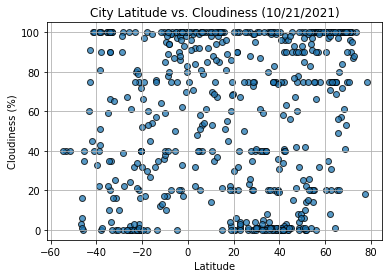

In [10]:
plt.scatter(city_latitude, city_cloudiness,edgecolor="black",alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date.today().strftime('%m/%d/%Y')})")
plt.savefig("../Images/Latitude_vs_Cloudiness.png")
plt.show()

The above scatter plot analyzes the relationship between the city latitude (the predictor) and city cloudiness (%) (the response). We can see that there is no association between the city latitude and the city cloudiness (%).

## Latitude vs. Wind Speed Plot

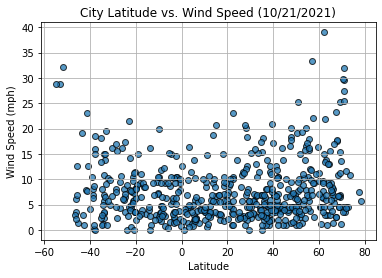

In [11]:
plt.scatter(city_latitude, city_wind_speed,edgecolor="black",alpha=0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({date.today().strftime('%m/%d/%Y')})")
plt.savefig("../Images/Latitude_vs_Wind_Speed.png")
plt.show()

The above scatter plot analyzes the relationship between the city latitude (the predictor) and city wind speed (mph) (the response). We can see that there is no association between the city latitude and the city wind speed (mph). Also, most cities of this dataset have a wind speed inferior to 15mph.

## Linear Regression

In [12]:
# Calculate the correlation coefficient and linear regression model 
northern_hem=weather_df.loc[weather_df["Lat"]>0]
southern_hem=weather_df.loc[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
x_north=northern_hem["Lat"]
y_north_temp=northern_hem["Max Temp"]
correlation=linregress(x_north,y_north_temp)[2]

The r-value is: -0.8415802196919673


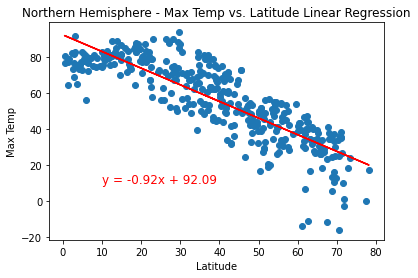

In [14]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(x_north,y_north_temp)
vc_fit = vc_slope * x_north + vc_int
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.scatter(x_north,y_north_temp)
plt.plot(x_north,vc_fit,"-",color="r",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.plot(x_north,vc_fit,"r-")
plt.annotate(line_eq,(10,10),fontsize=12,color="red")
print(f"The r-value is: {correlation}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
x_south=southern_hem["Lat"]
y_south_temp=southern_hem["Max Temp"]
correlation=linregress(x_south,y_south_temp)[2]

The r-value is: 0.6997803725949263


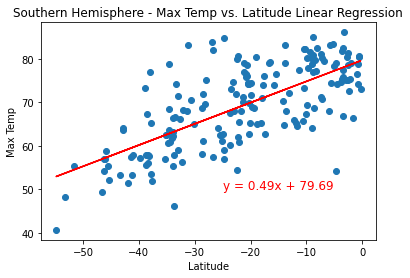

In [16]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(x_south,y_south_temp)
vc_fit = vc_slope * x_south + vc_int
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.scatter(x_south, y_south_temp)
plt.plot(x_south,vc_fit,"-",color="r",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.plot(x_south,vc_fit,"r-")
plt.annotate(line_eq,(-25,50),fontsize=12,color="red")
print(f"The r-value is: {correlation}")
plt.show()

The above Northern Hemisphere - Max Temp vs. Latitude Linear Regression plot confirms our analysis on the City Latitude vs. Max Temperature scatter plot. There is an negative relationship between the city latitude in the northern hemisphere and their max temperature. The temperature decreases as the latitude increases.

The above Southern Hemisphere - Max Temp vs. Latitude Linear Regression plot confirms our analysis on the City Latitude vs. Max Temperature scatter plot. There is an positive relationship between the city latitude in the southern hemisphere and their max temperature. The temperature increases as the latitude increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [17]:
x_north=northern_hem["Lat"]
y_north_humidity=northern_hem["Humidity"]
correlation=linregress(x_north,y_north_humidity)[2]

The r-value is: 0.08656073698359916


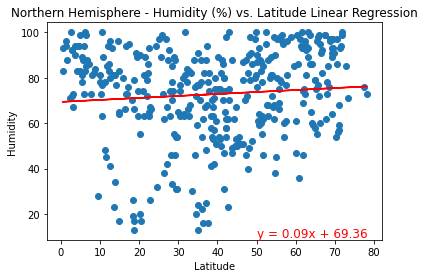

In [18]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(x_north,y_north_humidity)
vc_fit = vc_slope * x_north + vc_int
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.scatter(x_north,y_north_humidity)
plt.plot(x_north,vc_fit,"-",color="r",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.plot(x_north,vc_fit,"r-")
plt.annotate(line_eq,(50,10),fontsize=12,color="red")
print(f"The r-value is: {correlation}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [19]:
x_south=southern_hem["Lat"]
y_south_humidity=southern_hem["Humidity"]
correlation=linregress(x_south,y_south_humidity)[2]

The r-value is: 0.3270823482577509


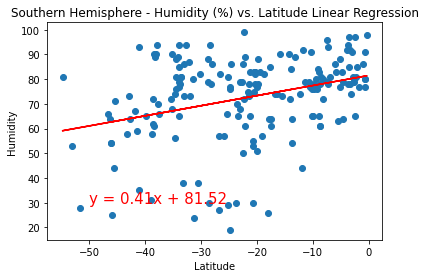

In [20]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(x_south,y_south_humidity)
vc_fit = vc_slope * x_south + vc_int
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.scatter(x_south, y_south_humidity)
plt.plot(x_south,vc_fit,"-",color="r",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.plot(x_south,vc_fit,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
print(f"The r-value is: {correlation}")
plt.show()

The above Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression plot confirms our analysis on the City Latitude vs. Humidity scatter plot. There is a very weak positive to no relationship between the two variables in the northen hemisphere.

The above Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression plot confirms our analysis on the City Latitude vs. Humidity scatter plot. There is a weak positive relationship between the two variables in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [21]:
x_north=northern_hem["Lat"]
y_north_cloudiness=northern_hem["Cloudiness"]
correlation=linregress(x_north,y_north_cloudiness)[2]

The r-value is: 0.09239015948446073


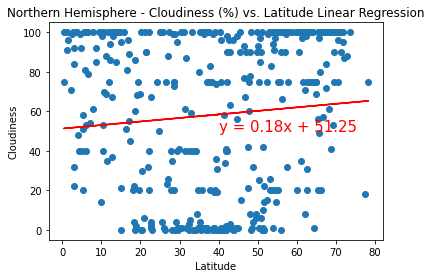

In [22]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(x_north,y_north_cloudiness)
vc_fit = vc_slope * x_north + vc_int
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.scatter(x_north,y_north_cloudiness)
plt.plot(x_north,vc_fit,"-",color="r",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.plot(x_north,vc_fit,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
print(f"The r-value is: {correlation}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [23]:
x_south=southern_hem["Lat"]
y_south_cloudiness=southern_hem["Cloudiness"]
correlation=linregress(x_south,y_south_cloudiness)[2]

The r-value is: 0.251126511603138


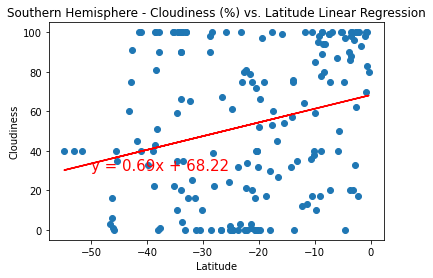

In [24]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(x_south,y_south_cloudiness)
vc_fit = vc_slope * x_south + vc_int
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.scatter(x_south, y_south_cloudiness)
plt.plot(x_south,vc_fit,"-",color="r",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.plot(x_south,vc_fit,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
print(f"The r-value is: {correlation}")
plt.show()

The above Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression plot confirms our analysis on the City Latitude vs. Cloudiness scatter plot. There is a very weak positive to no relationship between the two variables in the northern hemisphere.

The above Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression plot confirms our analysis on the City Latitude vs. Cloudiness scatter plot. There is a weak positive relationship between the two variables in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [25]:
x_north=northern_hem["Lat"]
y_north_wind=northern_hem["Wind"]
correlation=linregress(x_north,y_north_wind)[2]

The r-value is: 0.26816400665698353


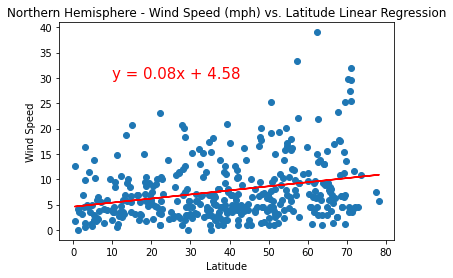

In [26]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(x_north,y_north_wind)
vc_fit = vc_slope * x_north + vc_int
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.scatter(x_north,y_north_wind)
plt.plot(x_north,vc_fit,"-",color="r",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.plot(x_north,vc_fit,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
print(f"The r-value is: {correlation}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [27]:
x_south=southern_hem["Lat"]
y_south_wind=southern_hem["Wind"]
correlation=linregress(x_south,y_south_wind)[2]

The r-value is: -0.2598369823079098


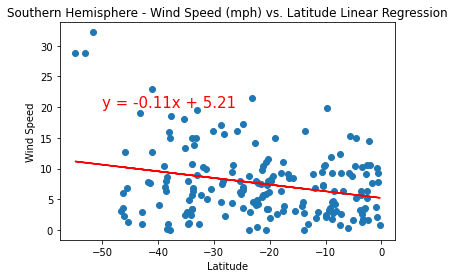

In [28]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(x_south,y_south_wind)
vc_fit = vc_slope * x_south + vc_int
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.scatter(x_south, y_south_wind)
plt.plot(x_south,vc_fit,"-",color="r",linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.plot(x_south,vc_fit,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-value is: {correlation}")
plt.show()

The above Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression plot confirms our analysis on the City Latitude vs. Wind Speed scatter plot. There is a weak positive relationship between the two variables in the northern hemisphere.

The above Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression plot confirms our analysis on the City Latitude vs. Wind Speed scatter plot. There is a weak negative relationship between the two variables in the southern hemisphere.